#### 1.Understand the Dataset
#### 2.Measures of Central Tendency
#### 3.Measures of Dispersion
#### 4.Distribution of the Data
#### 5.Correlation

## Dataset Information

The dataset contains information about the individuals’ age, gender, and several attributes affecting the income of a person.
##### To download the data set, please visit:- https://www.kaggle.com/datasets/umangsaluja/adult-income-dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# loading the dataset
data= pd.read_csv('adult_income.csv')
data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,1,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,1,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,1,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,1,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,1,0,3900,40,United-States,<=50K


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  int64 
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(7), object(8)
memory usage: 3.7+ MB


In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education.num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
sex,32561.0,0.330795,0.470506,0.0,0.0,0.0,1.0,1.0
capital.gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital.loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
hours.per.week,32561.0,40.431344,12.358681,0.0,40.0,40.0,45.0,99.0


In [10]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

### Measures of Central Tendency.

#### What is the average age of males and females in the data?

In [11]:
data.groupby('sex')['age'].mean()

sex
0    39.433547
1    36.858230
Name: age, dtype: float64

#### What is the value under which 95% of the capital gain would lie?

In [12]:
data['capital.gain'].quantile(0.95)

5013.0

#### Find the qualification of most of the Individuals.

In [14]:
data['education'].mode()

0    HS-grad
Name: education, dtype: object

#### Find the middle most observation of age for different working class.

In [15]:
data.groupby('workclass')['age'].median()

workclass
?                   35.0
Federal-gov         43.0
Local-gov           41.0
Never-worked        18.0
Private             35.0
Self-emp-inc        45.0
Self-emp-not-inc    44.0
State-gov           39.0
Without-pay         57.0
Name: age, dtype: float64

#### Compare the mean and trimmed mean of capital gain and comment on the presence of outliers.

In [16]:
data['capital.gain'].mean()

1077.6488437087312

In [17]:
# for trimmed mean
import scipy
from scipy import stats
scipy.stats.trim_mean(df['capital.gain'], proportiontocut=0.01)
# It Returns the mean of array after trimming distribution from both tails.

493.7085331077058

#### Find the percentage of race of people in the data.

In [18]:
(data.race.value_counts()/len(data))*100

White                 85.427352
Black                  9.594300
Asian-Pac-Islander     3.190934
Amer-Indian-Eskimo     0.955130
Other                  0.832284
Name: race, dtype: float64

### Measures of Dispersion.

#### Which occupation has more variability in the working hours?

In [19]:
data.groupby('occupation')['hours.per.week'].std().sort_values(ascending= False).head(5)

occupation
Farming-fishing    17.320156
Priv-house-serv    16.184548
?                  15.010581
Armed-Forces       14.071247
Sales              13.236410
Name: hours.per.week, dtype: float64

#### Are there any variables which can be excluded from further analysis based on their variability?

In [20]:
data.std()
# based on the result education.num can be dropped in terms of variability.

C:\Users\Apin PC\AppData\Local\Temp\ipykernel_10600\59999617.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.std()


age                   13.640433
fnlwgt            105549.977697
education.num          2.572720
sex                    0.470506
capital.gain        7385.292085
capital.loss         402.960219
hours.per.week        12.358681
dtype: float64

#### Calculate the percentage of variation in work hours for each work class.

In [21]:
(data.groupby('workclass')['hours.per.week'].std()/data.groupby('workclass')['hours.per.week'].mean()) * 100

workclass
?                   46.711116
Federal-gov         21.360037
Local-gov           26.283120
Never-worked              NaN
Private             27.954085
Self-emp-inc        28.473900
Self-emp-not-inc    37.537713
State-gov           29.968071
Without-pay         53.059084
Name: hours.per.week, dtype: float64

### Distribution of the Data.

In [22]:
# Here we prepare the function by which we can analyze our categorical columns. It's best practice to have function for Univariate Analysis. 
def dist_data(columns):
    sns.countplot(data=data, x=columns)
    plt.xticks(rotation=90)
    plt.show()
    print('Mode is',data[columns].mode()[0])

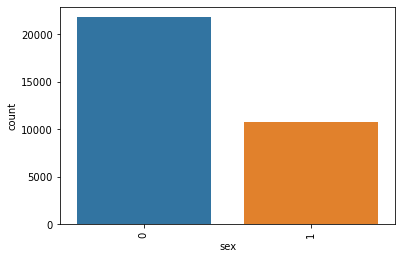

Mode is 0


In [23]:
dist_data('sex')

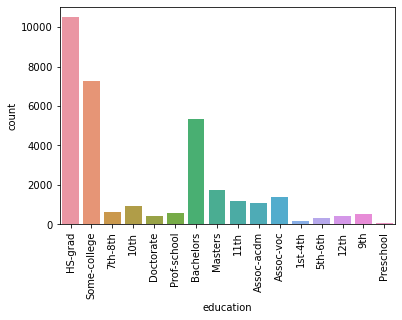

Mode is HS-grad


In [24]:
dist_data('education')

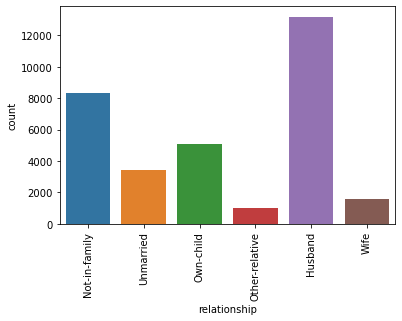

Mode is Husband


In [25]:
dist_data('relationship')

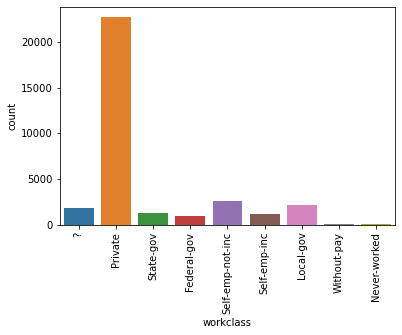

Mode is Private


In [26]:
dist_data('workclass')

#### Find the variables which have normal distribution.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


age 0.5587433694130483


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


fnlwgt 1.4469800945789828


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


education.num -0.31167586791022966


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


sex 0.7192925505964604


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


capital.gain 11.953847687699794


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


capital.loss 4.594629121679696


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


hours.per.week 0.22224067717684567


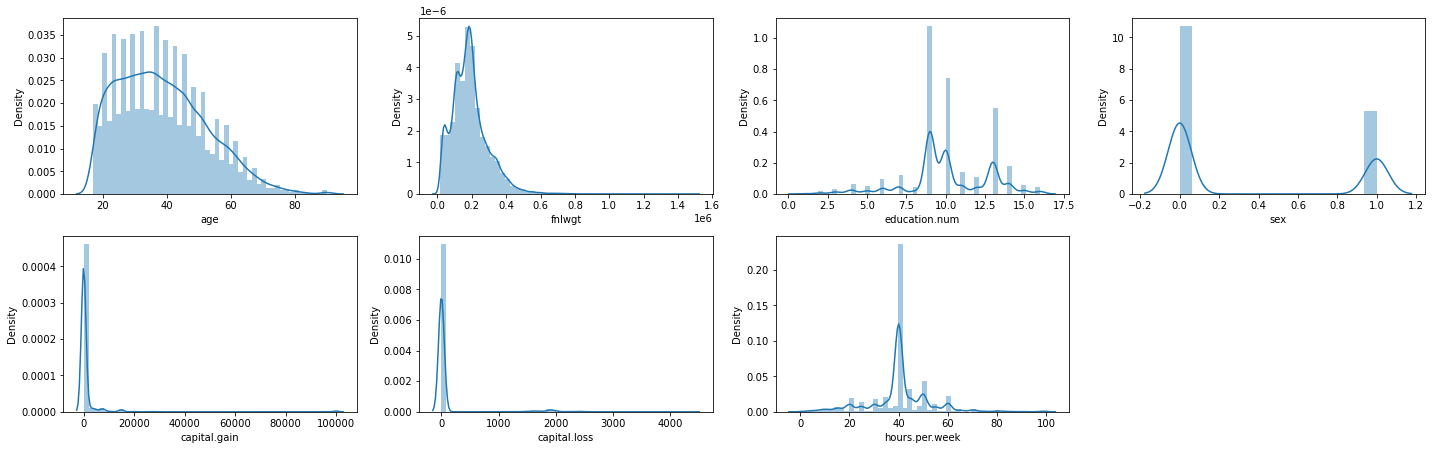

In [27]:
# To check for Normal distributions among variable
plt.figure(figsize=(20,15))
j=1
for i in data.columns:
    if data[i].dtypes == 'float64' or data[i].dtypes == 'int64':
        plt.subplot(5,4,j)
        sns.distplot(data[i])
        j+=1
        print(data[i].name,data[i].skew())
plt.tight_layout()
plt.show()
# we can see that variables like fnlwgt,capital.gain,capital.loss are highly skewed.

#### Find the working class for most of the population in the data.

<AxesSubplot:>

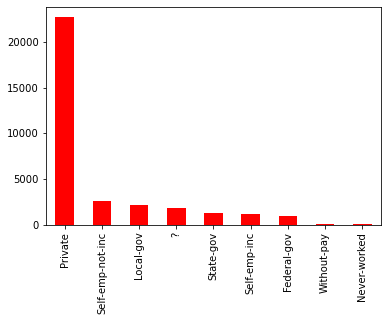

In [28]:
data.workclass.value_counts().plot(kind='bar',color='red')

#### How much time are most of the individuals working per week?

In [29]:
data['hours.per.week'].value_counts()

40    15214
50     2819
45     1824
60     1475
35     1296
      ...  
94        1
82        1
92        1
87        1
74        1
Name: hours.per.week, Length: 95, dtype: int64

### Correlation.


#### Find the effect of age on the working hours of a person.

In [30]:
data[['age','hours.per.week']].corr()

,age,hours.per.week
age,1.000000,0.069311
hours.per.week,0.069311,1.000000


#### Create the upper triangular correlation matrix

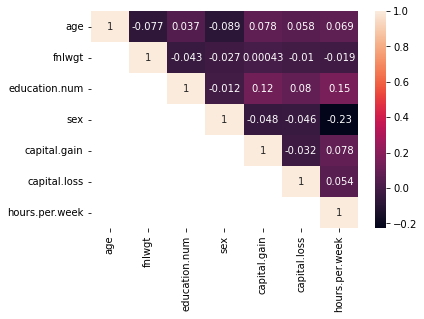

In [31]:
array = np.zeros_like(data.corr())
array[np.tril_indices_from(array,k=-1)]=True
sns.heatmap(data.corr(),mask= array,annot=True)
plt.show()